# Time Series Data - ARIMA / ARIMAX

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [2]:
buf = pd.read_csv('./폐렴(2014-2018).csv' ,parse_dates=['date'],index_col='date',encoding='cp949')

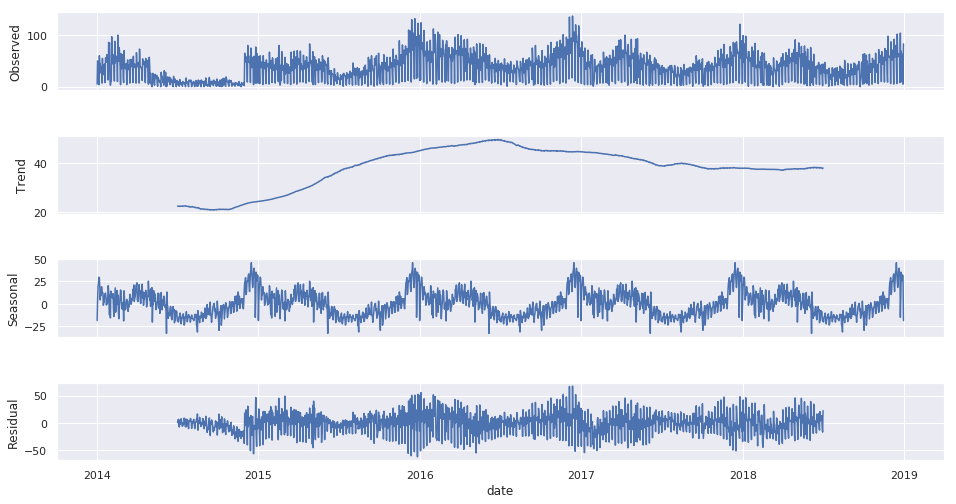

In [3]:
res = sm.tsa.seasonal_decompose(buf.폐렴.dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [4]:
tr_start,tr_end = '2014-01-01','2018-06-30'
te_start,te_end = '2018-10-01','2018-12-31'
tra = buf['폐렴'][tr_start:tr_end].dropna()
tes = buf['폐렴'][te_start:te_end].dropna()
testra = buf['폐렴']

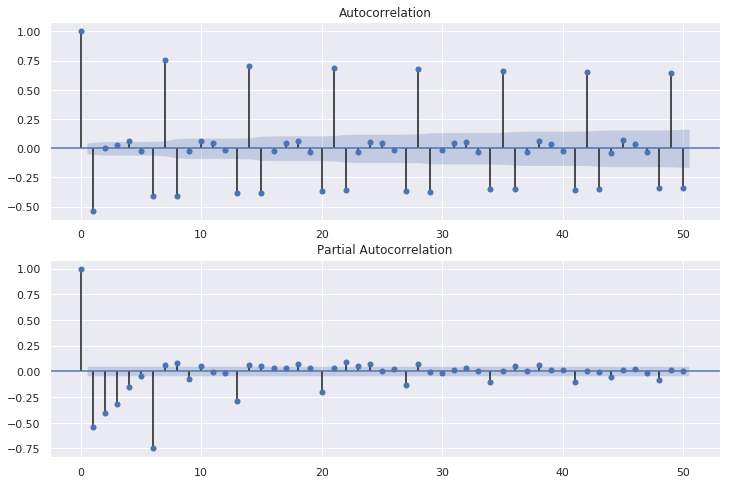

In [7]:
fig,ax = plt.subplots(2,1,figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [6]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='nc')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:512: Co

ARMA(p,q) = (10, 10) is the best.


c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# ARIMA

In [115]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                     폐렴   No. Observations:                 1642
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -6343.892
Date:                Wed, 12 Feb 2020   AIC                          12717.785
Time:                        14:56:25   BIC                          12798.757
Sample:                    01-01-2014   HQIC                         12747.822
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0411      0.031    -34.105      0.000      -1.101      -0.981
ar.L2         -1.0401      0.029    -35.269      0.000      -1.098      -0.982
ar.L3         -1.0383      0.029    -35.547      0.000      -1.096      -0.981
ar.L4         -1.0381      0.029    -35.382      0.000      -1.096      -0.981
ar.L5         -1.0401      0.029    -35.369      0.000      -1.098      -0.982
ar.L6         -1.0370      0.030    -34.974      0.000      -1.095      -0.979
ar.L7         -0.0446      0.029     -1.541      0.123      -0.101       0.012
ma.L1          0.0995      0.028      3.582      0.000       0.045       0.154
ma.L2          0.1369      0.019      7.260      0.000       0.100       0.174
ma.L3          0.1440      0.019      7.642      0.000       0.107       0.181
ma.L4          0.1412      0.019      7.330      0.000       0.103       0.179
ma.L5          0.1343      0.021      6.455      0.000       0.094       0.175
ma.L6          0.0909      0.021      4.351      0.000       0.050       0.132
ma.L7         -0.7084      0.017    -40.491      0.000      -0.743      -0.674
sigma2       147.0330      3.313     44.377      0.000     140.539     153.527
===================================================================================
Ljung-Box (Q):                       60.81   Jarque-Bera (JB):              2988.73
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -1.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

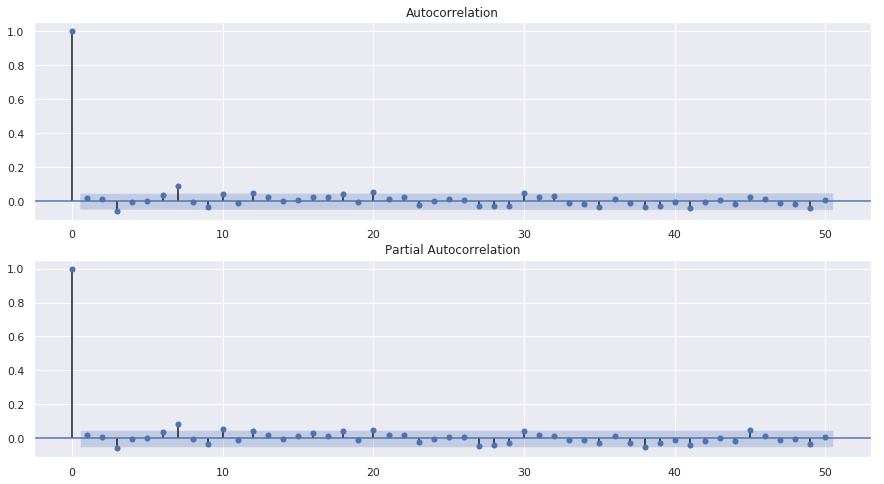

In [11]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMA model MSE:181.53560617830772


In [ ]:
pred.to_csv('E./폐렴_arima(2014-2018).csv',encoding='cp949')

In [117]:
from math import sqrt
print('ARIMA model RMSE:{}'.format(sqrt(mean_squared_error(tes,pred))))

ARIMA model MSE:13.473514989723643


In [118]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(tes,pred)

10.417575384299184

In [119]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(tes,pred)

70.53240388241575

In [120]:
def mean_percentage_error(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true)
mean_percentage_error(tes,pred)

-0.24183131078518857

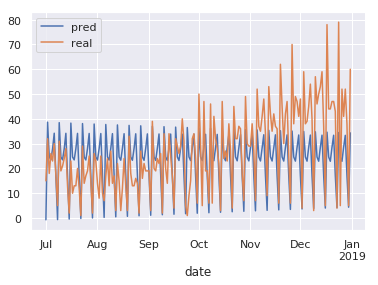

In [121]:
pd.DataFrame({'real':tes,'pred':pred}).plot()
plt.savefig('./폐렴_arima_6.png', format='png')

# ARIMAX

In [107]:
exog_train = buf.drop(['폐렴'],axis = 1)[tr_start:tr_end].dropna()
exog_test = buf.drop(['폐렴'],axis = 1)[te_start:te_end].dropna()

In [108]:
arimax = sm.tsa.statespace.SARIMAX(tra,order=(7,0,7),seasonal_order=(0,0,0,0),exog = exog_train,freq='D',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

c:\users\nari\appdata\local\programs\python\python35\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                     폐렴   No. Observations:                 1642
Model:               SARIMAX(7, 0, 7)   Log Likelihood               -6357.960
Date:                Wed, 12 Feb 2020   AIC                          12771.919
Time:                        14:54:55   BIC                          12923.085
Sample:                    01-01-2014   HQIC                         12827.993
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1             5.3494      6.647      0.805      0.421      -7.679      18.377
V2           -25.4487      8.598     -2.960      0.003     -42.301      -8.596
V3             6.4634      3.599      1.796      0.073      -0.591      13.517
V4             0.8026      3.672      0.219      0.827      -6.393       7.999
V5             8.0734      3.121      2.587      0.010       1.957      14.190
V6             2.7809      3.393      0.820      0.412      -3.869       9.430
V7            10.5973      4.063      2.609      0.009       2.635      18.560
V8            10.1012      4.395      2.299      0.022       1.488      18.714
V9             9.3595      4.470      2.094      0.036       0.598      18.121
V10           14.1048      4.085      3.453      0.001       6.099      22.111
V11            8.9483      3.931      2.276      0.023       1.244      16.652
V12            8.7140      4.421      1.971      0.049       0.050      17.378
V13            5.8220      4.163      1.399      0.162      -2.336      13.981
ar.L1         -0.0098      0.006     -1.695      0.090      -0.021       0.002
ar.L2         -0.0139      0.006     -2.293      0.022      -0.026      -0.002
ar.L3         -0.0129      0.006     -2.144      0.032      -0.025      -0.001
ar.L4         -0.0137      0.006     -2.241      0.025      -0.026      -0.002
ar.L5         -0.0154      0.006     -2.529      0.011      -0.027      -0.003
ar.L6         -0.0092      0.007     -1.365      0.172      -0.022       0.004
ar.L7          0.9797      0.006    152.982      0.000       0.967       0.992
ma.L1          0.0813      0.017      4.762      0.000       0.048       0.115
ma.L2          0.1382      0.020      7.030      0.000       0.100       0.177
ma.L3          0.1508      0.018      8.236      0.000       0.115       0.187
ma.L4          0.1388      0.019      7.140      0.000       0.101       0.177
ma.L5          0.1276      0.019      6.812      0.000       0.091       0.164
ma.L6          0.0768      0.020      3.879      0.000       0.038       0.116
ma.L7         -0.7297      0.018    -39.623      0.000      -0.766      -0.694
sigma2       144.5667      3.363     42.987      0.000     137.975     151.158
===================================================================================
Ljung-Box (Q):                       73.01   Jarque-Bera (JB):              2616.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.91
Prob(H) (two-sided):                  0.04   Kurtosis:                         8.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

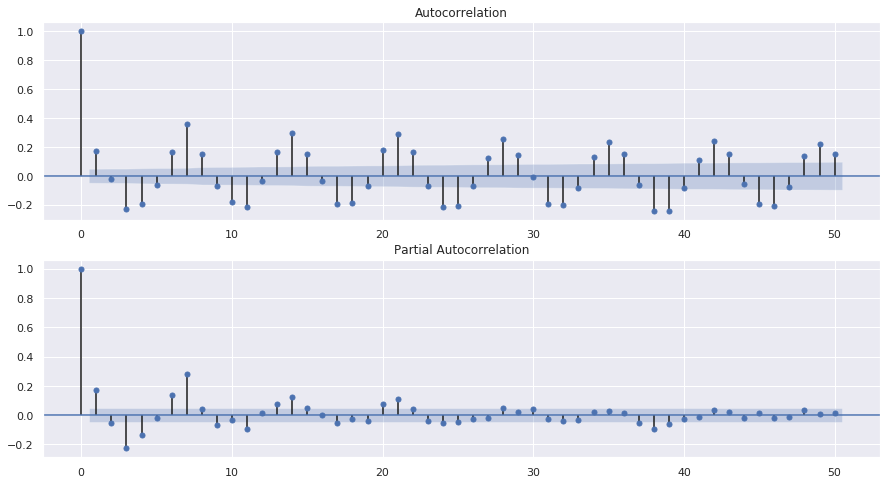

In [101]:
res = arimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error
pred = arimax.predict(tr_end,te_end,exog = exog_test)[1:]
print('ARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMAX model MSE:98.97709688789315


In [ ]:
pred.to_csv('./폐렴_arimax(2014-2018).csv',encoding='cp949')

In [110]:
from math import sqrt
print('ARIMAX model RMSE:{}'.format(sqrt(mean_squared_error(tes,pred))))

ARIMAX model MSE:9.948723379805731


In [111]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(tes,pred)

7.403471176697283

In [112]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(tes,pred)

82.78934583350545

In [113]:
def mean_percentage_error(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true)
mean_percentage_error(tes,pred)

-0.5976076532105803

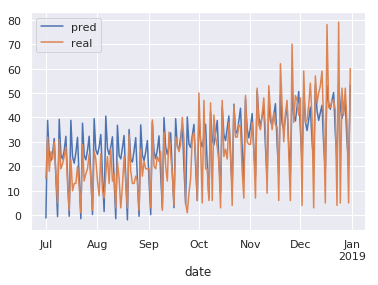

In [114]:
pd.DataFrame({'real':tes,'pred':pred}).plot()
plt.savefig('./폐렴_arimax_6.png', format='png')